# Statistics for FLiT Test Results

This file is playing around with generating statistics for the FLiT test results.  It also attempts to plot.

$$
 \int_{-\infty}^\infty e^{-x^2 \sin x} dx
$$

In [1]:
import csv
with open('./latest-run.csv', 'r') as infile:
    reader = csv.DictReader(infile)
    rows = [x for x in reader]

In [2]:
sorted(rows[0].keys())

['compiler',
 'file',
 'host',
 'index',
 'name',
 'precision',
 'run',
 'score0',
 'score0d',
 'score1',
 'score1d',
 'sort',
 'switches']

In [3]:
names = set(x['name'] for x in rows)
switches = set(x['switches'] for x in rows)
compilers = set(x['compiler'] for x in rows)
precisions = set(x['precision'] for x in rows)
sorts = set(x['sort'] for x in rows)

In [4]:
names

{'DoHariGSBasic',
 'DoHariGSImproved',
 'DoMatrixMultSanity',
 'DoOrthoPerturbTest',
 'DoSimpleRotate90',
 'DoSkewSymCPRotationTest',
 'RotateAndUnrotate',
 'RotateFullCircle',
 'TrianglePHeron',
 'TrianglePSylv'}

In [5]:
switches

{'',
 '-O0',
 '-O1',
 '-O2',
 '-O3',
 '-fassociative-math ',
 '-fcx-fortran-rules ',
 '-fcx-limited-range ',
 '-fexcess-precision=fast ',
 '-fexcess-precision=standard',
 '-ffast-math',
 '-ffinite-math-only',
 '-ffloat-store ',
 '-ffp-contract=on ',
 '-fma ',
 '-fmerge-all-constants ',
 '-fno-trapping-math ',
 '-fp-model fast=1',
 '-fp-model fast=2',
 '-fp-model=double',
 '-fp-model=extended',
 '-fp-model=precise',
 '-fp-model=source',
 '-fp-model=strict',
 '-fp-port ',
 '-fp-trap=common',
 '-freciprocal-math ',
 '-frounding-math ',
 '-fsignaling-nans ',
 '-fsingle-precision-constant',
 '-ftz ',
 '-funsafe-math-optimizations',
 '-mavx',
 '-mfpmath=sse -mtune=native',
 '-mp1 ',
 '-no-fma',
 '-no-ftz',
 '-no-prec-div',
 '-prec-div '}

In [6]:
compilers

{' clang++-3.6', 'g++', 'icpc -mlong-double-80'}

In [7]:
precisions

{'d', 'e', 'f'}

In [8]:
sorts

{'bi', 'gt', 'lt', 'us'}

In [9]:
def stats_by_compiler(rows, compiler):
    '''
    Returns a dictionary of { switch -> # tests } where switch is the set
    of switches specified in the row and the tests are compared against
    the row with no switches.  This is done keeping everything else
    constant including 'host', 'precision' and 'sort'.

    The maximum count is the number of tests tested for that compiler
    which is the 'name' column, so the number of unique 'name' elements
    in the rows.
    '''
    names = set(x['name'] for x in rows)
    switches = set(x['switches'] for x in rows)
    compiler_rows = [x for x in rows if x['compiler'] == compiler]
    switch_counts = {}
    switch_totals = {}
    for switch in switches:
        switch_counts[switch] = 0
        switch_totals[switch] = sum(
            1 for x in compiler_rows if x['switches'] == switch)
    groups = {}
    for name in names:
        groups[name] = [x for x in compiler_rows if x['name'] == name]
    for name in names:
        base_rows = [x for x in groups[name] if x['switches'] == '']
        for switch in switches:
            switch_rows = [x for x in groups[name]
                           if x['switches'] == switch]
            for switch_row in switch_rows:
                base_matches = [x for x in base_rows
                                if x['host'] == switch_row['host']
                                and x['precision'] == switch_row['precision']
                                and x['sort'] == switch_row['sort']
                               ]
                assert len(base_matches) == 1, len(base_matches)
                match = base_matches[0]
                if switch_row['score0'] != match['score0']:
                    switch_counts[switch] += 1
                    break
    return switch_counts

In [10]:
stats_by_compiler(rows, 'g++')

{'': 0,
 '-O0': 0,
 '-O1': 0,
 '-O2': 0,
 '-O3': 0,
 '-fassociative-math ': 0,
 '-fcx-fortran-rules ': 0,
 '-fcx-limited-range ': 0,
 '-fexcess-precision=fast ': 0,
 '-fexcess-precision=standard': 0,
 '-ffast-math': 0,
 '-ffinite-math-only': 0,
 '-ffloat-store ': 0,
 '-ffp-contract=on ': 0,
 '-fma ': 0,
 '-fmerge-all-constants ': 0,
 '-fno-trapping-math ': 0,
 '-fp-model fast=1': 0,
 '-fp-model fast=2': 0,
 '-fp-model=double': 0,
 '-fp-model=extended': 0,
 '-fp-model=precise': 0,
 '-fp-model=source': 0,
 '-fp-model=strict': 0,
 '-fp-port ': 0,
 '-fp-trap=common': 0,
 '-freciprocal-math ': 0,
 '-frounding-math ': 0,
 '-fsignaling-nans ': 0,
 '-fsingle-precision-constant': 0,
 '-ftz ': 0,
 '-funsafe-math-optimizations': 0,
 '-mavx': 0,
 '-mfpmath=sse -mtune=native': 0,
 '-mp1 ': 0,
 '-no-fma': 0,
 '-no-ftz': 0,
 '-no-prec-div': 0,
 '-prec-div ': 0}

In [11]:
stats_by_compiler(rows, ' clang++-3.6')

{'': 0,
 '-O0': 0,
 '-O1': 0,
 '-O2': 0,
 '-O3': 0,
 '-fassociative-math ': 0,
 '-fcx-fortran-rules ': 0,
 '-fcx-limited-range ': 0,
 '-fexcess-precision=fast ': 0,
 '-fexcess-precision=standard': 0,
 '-ffast-math': 0,
 '-ffinite-math-only': 0,
 '-ffloat-store ': 0,
 '-ffp-contract=on ': 0,
 '-fma ': 0,
 '-fmerge-all-constants ': 0,
 '-fno-trapping-math ': 0,
 '-fp-model fast=1': 0,
 '-fp-model fast=2': 0,
 '-fp-model=double': 0,
 '-fp-model=extended': 0,
 '-fp-model=precise': 0,
 '-fp-model=source': 0,
 '-fp-model=strict': 0,
 '-fp-port ': 0,
 '-fp-trap=common': 0,
 '-freciprocal-math ': 0,
 '-frounding-math ': 0,
 '-fsignaling-nans ': 0,
 '-fsingle-precision-constant': 0,
 '-ftz ': 0,
 '-funsafe-math-optimizations': 0,
 '-mavx': 0,
 '-mfpmath=sse -mtune=native': 0,
 '-mp1 ': 0,
 '-no-fma': 0,
 '-no-ftz': 0,
 '-no-prec-div': 0,
 '-prec-div ': 0}

In [15]:
icpc_stats = stats_by_compiler(rows, 'icpc -mlong-double-80')
icpc_stats

{'': 0,
 '-O0': 3,
 '-O1': 2,
 '-O2': 0,
 '-O3': 0,
 '-fassociative-math ': 0,
 '-fcx-fortran-rules ': 0,
 '-fcx-limited-range ': 0,
 '-fexcess-precision=fast ': 0,
 '-fexcess-precision=standard': 0,
 '-ffast-math': 0,
 '-ffinite-math-only': 0,
 '-ffloat-store ': 0,
 '-ffp-contract=on ': 0,
 '-fma ': 0,
 '-fmerge-all-constants ': 0,
 '-fno-trapping-math ': 0,
 '-fp-model fast=1': 0,
 '-fp-model fast=2': 0,
 '-fp-model=double': 5,
 '-fp-model=extended': 6,
 '-fp-model=precise': 3,
 '-fp-model=source': 3,
 '-fp-model=strict': 3,
 '-fp-port ': 0,
 '-fp-trap=common': 0,
 '-freciprocal-math ': 0,
 '-frounding-math ': 3,
 '-fsignaling-nans ': 0,
 '-fsingle-precision-constant': 0,
 '-ftz ': 0,
 '-funsafe-math-optimizations': 0,
 '-mavx': 1,
 '-mfpmath=sse -mtune=native': 0,
 '-mp1 ': 0,
 '-no-fma': 0,
 '-no-ftz': 0,
 '-no-prec-div': 2,
 '-prec-div ': 0}

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

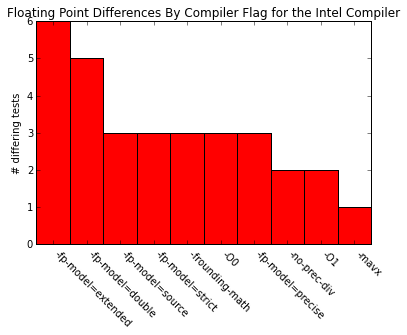

In [30]:
items = sorted([x for x in icpc_stats.items() if x[1] > 0],
               key=lambda x: x[1], reverse=True)
ind = np.arange(len(items))  # x-location of each of the groups
width = 1                    # Width of the bars

fig, ax = plt.subplots()
ax.bar(ind, [x[1] for x in items], width, color='r')
ax.set_ylabel('# differing tests')
ax.set_title('Floating Point Differences By Compiler Flag for the Intel Compiler')
ax.set_xticks(ind + width/2)
ax.set_xticklabels([x[0] for x in items], rotation=-45, ha='left')


plt.show()

In [31]:
items

[('-fp-model=extended', 6),
 ('-fp-model=double', 5),
 ('-fp-model=source', 3),
 ('-fp-model=strict', 3),
 ('-frounding-math ', 3),
 ('-O0', 3),
 ('-fp-model=precise', 3),
 ('-no-prec-div', 2),
 ('-O1', 2),
 ('-mavx', 1)]